# Self-driving Car Project by Using the NVIDIA Model 

## Introduction
In this notebook, we are going to try to code a simple self-driving car project. The data that we will used during the project was obtained via the Udacity Self-driving Car Simulator. The main purpose of this project is to predict the correct steering value by using three images that are taken at the same time. We are going to use the NVIDIA model, which is a specific CNN model, to predict steering values.

**Note**: 
* To get the Udacity Self-driving Car Simulator, you can use the following link: https://github.com/udacity/self-driving-car-sim
* To download the data, you can use the following link: https://drive.google.com/file/d/1cbjYNMkUkYVXrcTICBgwuBu1TpYNkG8J/view?usp=share_link

## Codes
This notebook is separated into two main parts which are preprocessing and model parts. Let's start with the preprocessing part.

### Preprocessing
Firstly, we start to import the required libraries. If you do not familiarize some of them, it is beneficial to check their documentation beforehand.

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from imgaug import augmenters as iaa
import cv2

import ntpath
import random
import os

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


Then, we need to import the data. The data contains around 81000 images and a csv file. While collecting the data via the simulator, there are three cameras on the car, and these cameras take photo simultaneously. The csv file concadenates the images that are taken at the same time, and also it stores some information about the images such as steering, throttle, reverse, and speed values.

In [2]:
# import data

columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
pd.set_option('display.max_colwidth', None)

data = pd.read_csv('Data/driving_log.csv', names = columns)

data.head()

center  \
0  C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\center_2022_09_18_12_03_15_522.jpg   
1  C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\center_2022_09_18_12_03_15_626.jpg   
2  C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\center_2022_09_18_12_03_15_729.jpg   
3  C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\center_2022_09_18_12_03_15_832.jpg   
4  C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\center_2022_09_18_12_03_15_935.jpg   

                                                                                                                                                left  \
0   C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\left_2022_09_18_12_03_15_522.jpg   
1   C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\left_2022_09_18_12_03_15_626.jpg   
2   C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\left_2022_09_18_12_03_15_729.jpg   
3   C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\left_2022_09_18_12_03_15_832.jpg   
4   C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\left_2022_09_18_12_03_15_935.jpg   

                                                                                                                                                right  \
0   C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\right_2022_09_18_12_03_15_522.jpg   
1   C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\right_2022_09_18_12_03_15_626.jpg   
2   C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\right_2022_09_18_12_03_15_729.jpg   
3   C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\right_2022_09_18_12_03_15_832.jpg   
4   C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\right_2022_09_18_12_03_15_935.jpg   

   steering  throttle  reverse     speed  
0       0.0       0.0      0.0  0.000079  
1       0.0       0.0      0.0  0.000078  
2       0.0       0.0      0.0  0.000083  
3       0.0       0.0      0.0  0.000078  
4       0.0       0.0      0.0  0.000080

As you see above, the csv file contains the images with their exact paths. For the sake of simplicity, let's get rid of the unnecessary parts of these paths. To do this, let's define a function called "path_leaf", and apply this function to all elements.

In [3]:
# simplify data

def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail


data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)

data.head()

center                              left  \
0  center_2022_09_18_12_03_15_522.jpg  left_2022_09_18_12_03_15_522.jpg   
1  center_2022_09_18_12_03_15_626.jpg  left_2022_09_18_12_03_15_626.jpg   
2  center_2022_09_18_12_03_15_729.jpg  left_2022_09_18_12_03_15_729.jpg   
3  center_2022_09_18_12_03_15_832.jpg  left_2022_09_18_12_03_15_832.jpg   
4  center_2022_09_18_12_03_15_935.jpg  left_2022_09_18_12_03_15_935.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2022_09_18_12_03_15_522.jpg       0.0       0.0      0.0  0.000079  
1  right_2022_09_18_12_03_15_626.jpg       0.0       0.0      0.0  0.000078  
2  right_2022_09_18_12_03_15_729.jpg       0.0       0.0      0.0  0.000083  
3  right_2022_09_18_12_03_15_832.jpg       0.0       0.0      0.0  0.000078  
4  right_2022_09_18_12_03_15_935.jpg       0.0       0.0      0.0  0.000080

To understand the data deeply, let's visualize it with the help of a hist graph.

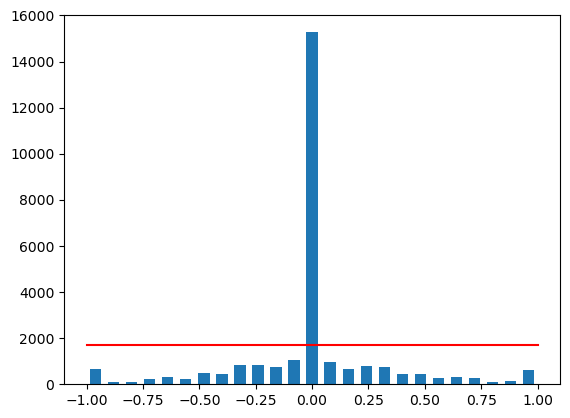

In [4]:
# visualize data

n_bins = 25
samples_per_bin = 1700

hist, bins = np.histogram(data['steering'], n_bins)
center = (bins[:-1] + bins[1:]) * 0.5

plt.bar(center, hist, width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin), 'r')
plt.show()

When looking at the graph, you can obviously see that the entries whose steering value is zero dominate other entries. This is going to cause overfitting in our model and have negative effects on it. Therefore, we need to decrease this dominance by removing some entries whose steering value is zero. Let 1700 be the threshold value for this removing process. Now, we can remove the entries randomly as the following:

total data: 27024
removed data: 13569
remaining data: 13455


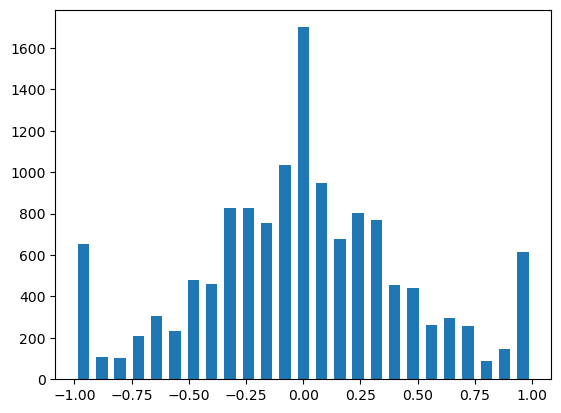

In [5]:
# remove data

remove_list = list()

for j in range(n_bins):
    list_ = list()
    for i in range(len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
            list_.append(i)
            
    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print('total data:', len(data))
print('removed data:', len(remove_list))

data.drop(data.index[remove_list], inplace = True)
print('remaining data:', len(data))

hist, _ = np.histogram(data['steering'], n_bins)
plt.bar(center, hist, width = 0.05)
plt.show()

The dominance has decreased after removing process as seem. Now, let's upload the remaining image paths and their steering values to lists called "image_paths" and "steerings". To do this, let's firstly define a function called "load_img_steering".

In [6]:
# import images

datadir = 'Data'

def load_img_steering(datadir, data):
    image_paths = list()
    steerings = list()
    
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        
        image_paths.append(os.path.join(datadir, center.strip()))
        steerings.append(float(indexed_data[3]))
        
    image_paths = np.asarray(image_paths)
    steerings = np.asarray(steerings)
    
    return image_paths, steerings


image_paths, steerings = load_img_steering(datadir + '/IMG', data)

for i in range(5):
    print("Path: {}".format(image_paths[i]))
    print("Steering: {}".format(steerings[i]))

Path: Data/IMG\center_2022_09_18_12_03_16_749.jpg
Steering: -0.06088828
Path: Data/IMG\center_2022_09_18_12_03_16_956.jpg
Steering: -0.0527508
Path: Data/IMG\center_2022_09_18_12_03_17_057.jpg
Steering: -0.1974975
Path: Data/IMG\center_2022_09_18_12_03_17_262.jpg
Steering: -0.09590010000000002
Path: Data/IMG\center_2022_09_18_12_03_17_363.jpg
Steering: -0.40126409999999996


Since the data is ready to go to the model, we can split it into training and validation.

In [7]:
# create train and validation cases.

X_train, X_val, y_train, y_val = train_test_split(image_paths, steerings, test_size=0.2, random_state=8)

print('Training Samples: {}\nValidation Samples: {}'.format(len(X_train), len(X_val)))

Training Samples: 10764
Validation Samples: 2691


Let's visualize the train and validation cases.

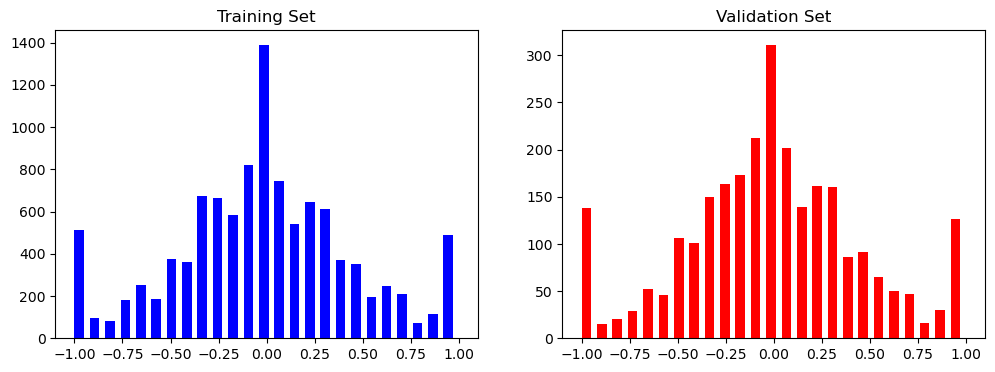

In [8]:
# visualize train and test cases

fig, ax = plt.subplots(1, 2, figsize = (12,4))

ax[0].hist(y_train, bins = n_bins, width = 0.05, color = 'blue')
ax[0].set_title('Training Set')

ax[1].hist(y_val, bins=n_bins, width = 0.05, color='red')
ax[1].set_title('Validation Set')

plt.show()

Before starting to code the CNN model, we have to augment the data to increase the variety and noise. Therefore, we need some functions that are going to be useful, such as "zoom", "pan", "img_random_brightness", and "img_random_flip". Increasing the variety and noise will effect the model positively because it will prevent overfitting. You can check each function below separately to understand how each of them exactly works and what it does. 

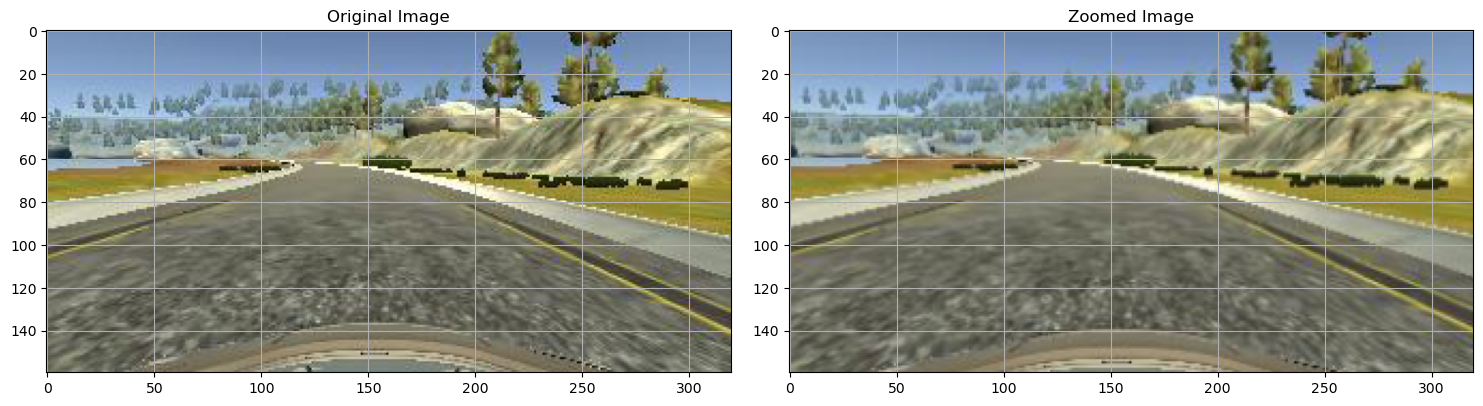

In [9]:
def zoom(image):
    zoom = iaa.Affine(scale = (1, 1.3))
    image = zoom.augment_image(image)
    return image


image = image_paths[100]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, ax = plt.subplots(1, 2, figsize = (15,10))
fig.tight_layout()

ax[0].imshow(original_image)
ax[0].set_title('Original Image')
ax[0].grid()

ax[1].imshow(zoomed_image)
ax[1].set_title('Zoomed Image')
ax[1].grid()

plt.show()

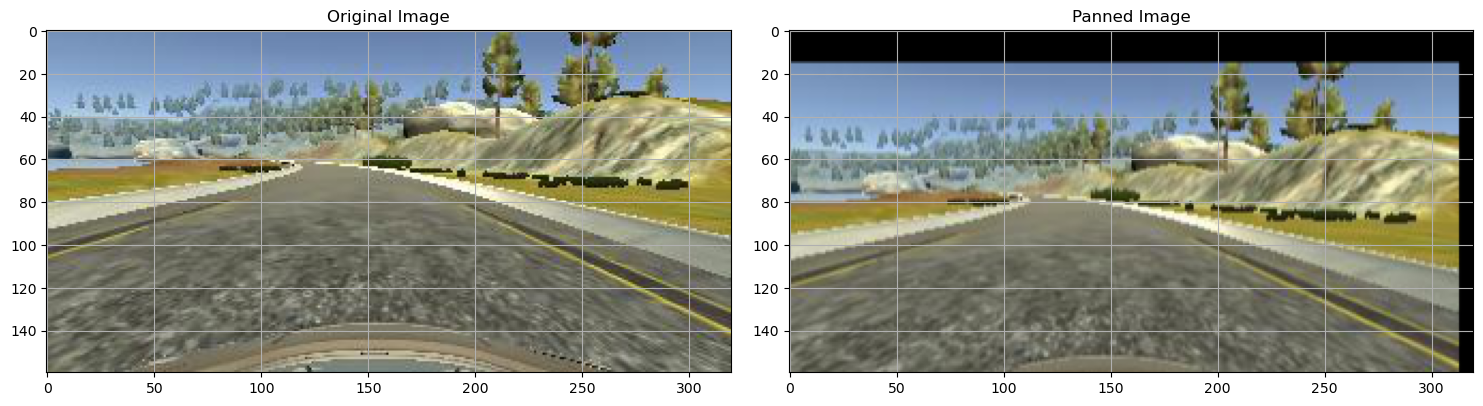

In [10]:
def pan(image):
    pan = iaa.Affine(translate_percent={'x': (-0.1, 0.1), 'y': (-0.1, 0.1)})
    image = pan.augment_image(image)
    return image


image = image_paths[100]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, ax = plt.subplots(1, 2, figsize = (15,10))
fig.tight_layout()

ax[0].imshow(original_image)
ax[0].set_title('Original Image')
ax[0].grid()

ax[1].imshow(panned_image)
ax[1].set_title('Panned Image')
ax[1].grid()

plt.show()

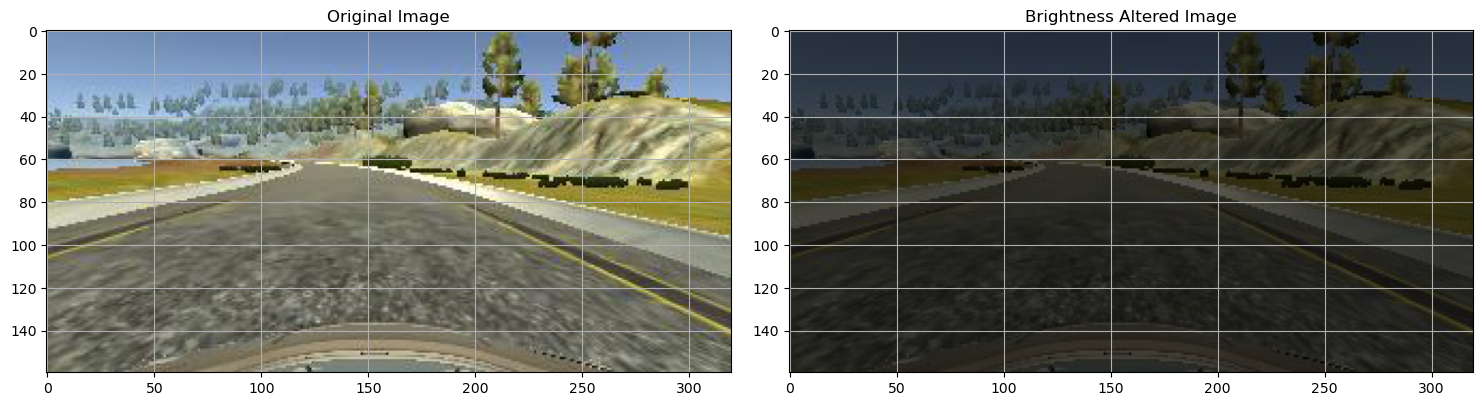

In [11]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image


image = image_paths[100]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, ax = plt.subplots(1, 2, figsize = (15,10))
fig.tight_layout()

ax[0].imshow(original_image)
ax[0].set_title('Original Image')
ax[0].grid()

ax[1].imshow(brightness_altered_image)
ax[1].set_title('Brightness Altered Image')
ax[1].grid()

plt.show()

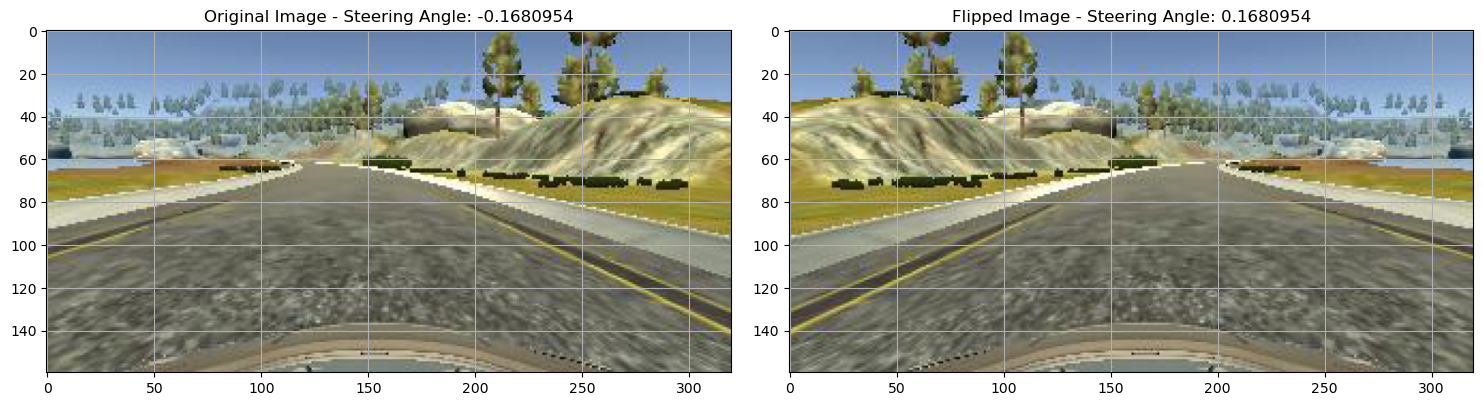

In [12]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image, 1)
    steering_angle = -steering_angle
    return image, steering_angle


image = image_paths[100]
steering_angle = steerings[100]
original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, ax = plt.subplots(1, 2, figsize = (15,10))
fig.tight_layout()

ax[0].imshow(original_image)
ax[0].set_title('Original Image - ' + 'Steering Angle: ' + str(steering_angle))
ax[0].grid()

ax[1].imshow(flipped_image)
ax[1].set_title('Flipped Image - ' + 'Steering Angle: ' + str(flipped_steering_angle))
ax[1].grid()

plt.show()

To increase randomness, let's define a function called "random_augment". That function is going to randomly augment our data by using the functions that are defined above.

In [13]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    
    if np.random.rand() < 0.5:
        image = zoom(image)
        
    if np.random.rand() < 0.5:
        image = pan(image)
        
    if np.random.rand() < 0.5:
        image = img_random_brightness(image)
        
    if np.random.rand() < 0.5:
        image, steering_angle = img_random_flip(image, steering_angle)
        
    return image, steering_angle

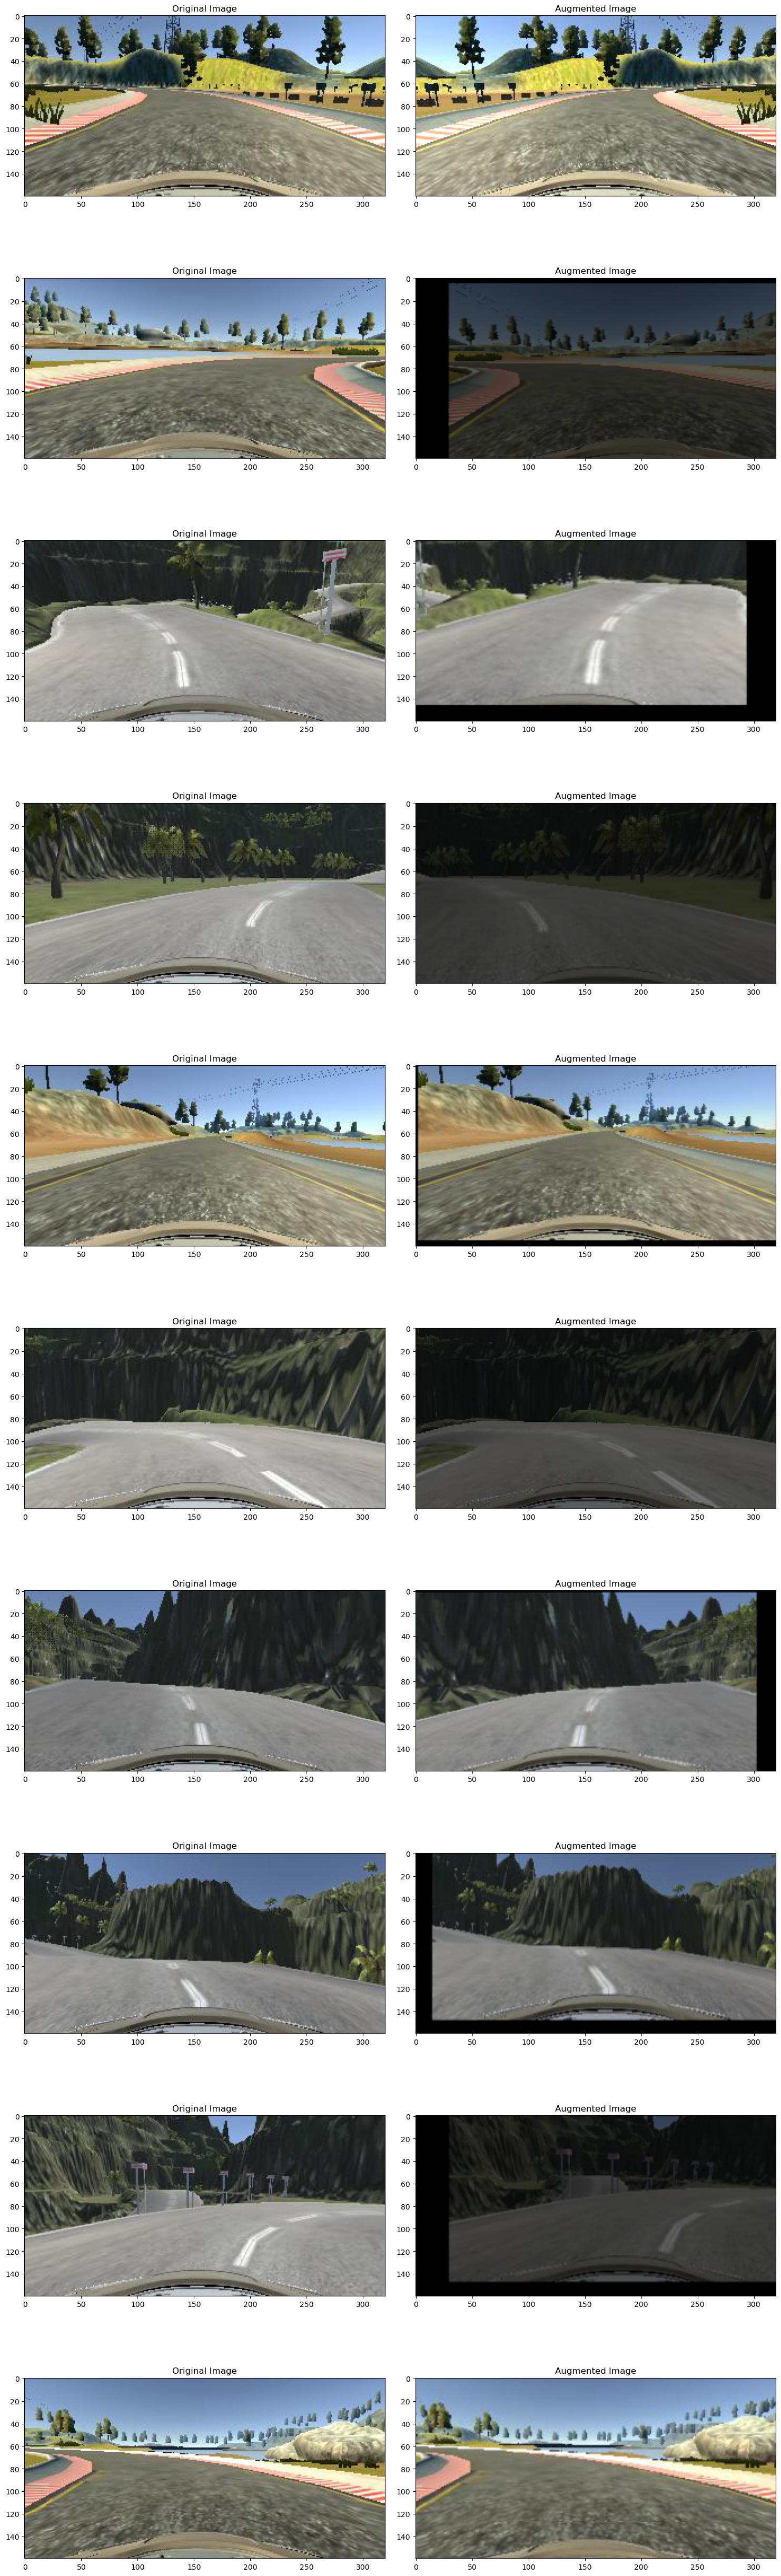

In [14]:
n_cols = 2
n_rows = 10

fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 50))
fig.tight_layout()

for i in range(n_rows):
    randnum = random.randint(0, len(image_paths) - 1)
    
    random_image = image_paths[randnum]
    random_steering = steerings[randnum]
    
    original_image = mpimg.imread(random_image)
    augmented_image, _ = random_augment(random_image, random_steering)
    
    ax[i][0].imshow(original_image)
    ax[i][0].set_title('Original Image')
    
    ax[i][1].imshow(augmented_image)
    ax[i][1].set_title('Augmented Image')

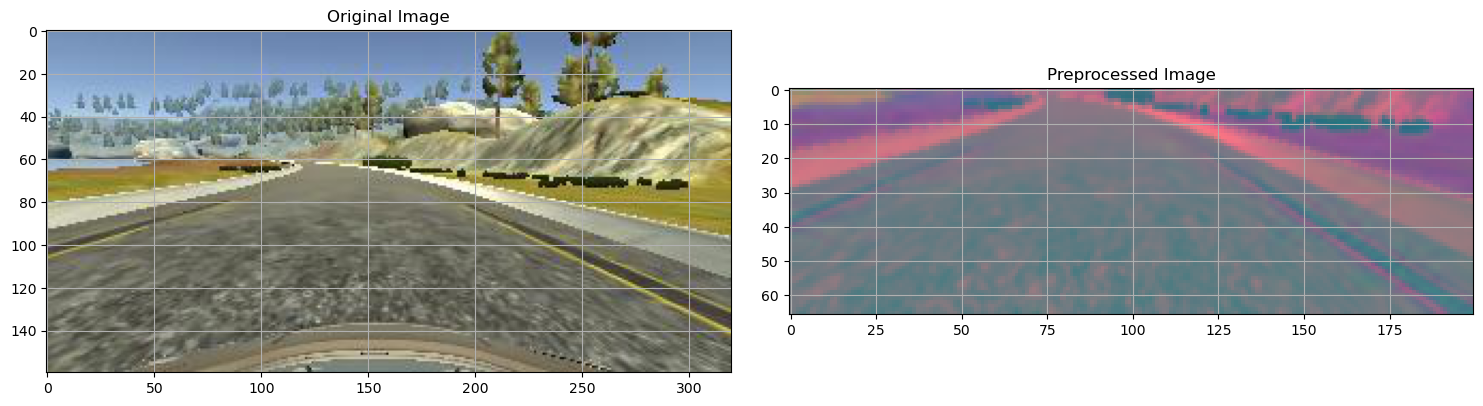

In [15]:
def img_preprocess(img):
    img = img[60:135, :, :]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3,3), 0)
    img = cv2.resize(img, (200, 66))
    img = img / 255.0
    return img


image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, ax = plt.subplots(1, 2, figsize = (15,10))
fig.tight_layout()

ax[0].imshow(original_image)
ax[0].set_title('Original Image')
ax[0].grid()

ax[1].imshow(preprocessed_image)
ax[1].set_title('Preprocessed Image')
ax[1].grid()

plt.show()

In this project, we are going to use NVIDIA model to train our model. As the NVIDIA model, we need to manipulate the some features of images. For detailed information about how to manipulate the images before feeding the model, you can check the following links:
* https://developer.nvidia.com/blog/deep-learning-self-driving-cars/
* https://www.researchgate.net/publication/358106939_Self-Driving_Car_to_Drive_Autonomously_using_Image_Processing_and_Deep_Learning

Now, we are ready to continue with the model part. 

### Model
In this part, we are going to construct the NVIDIA model, which is a specific CNN model. The architecture of the model is the below. 

<img src="NVIDIA_model_architecture.png" alt="NVIDIA Model Architecture" style="height: 500px; width:400px;"/>

First, we need to create the batch generator of the model. This is a generator function, and it returns "batch_size" augmented and manipulated images every time it is called.

In [16]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
    while True:
        batch_img = list()
        batch_steering = list()
        
        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1)
            
            if istraining:
                img, steering = random_augment(image_paths[random_index], steering_ang[random_index])
                
            else:
                img = mpimg.imread(image_paths[random_index])
                steering = steering_ang[random_index]
                
            img = img_preprocess(img)
            batch_img.append(img)
            batch_steering.append(steering)
            
        yield (np.asarray(batch_img), np.asarray(batch_steering))

Let's try the function to see whether it works correctly or not.

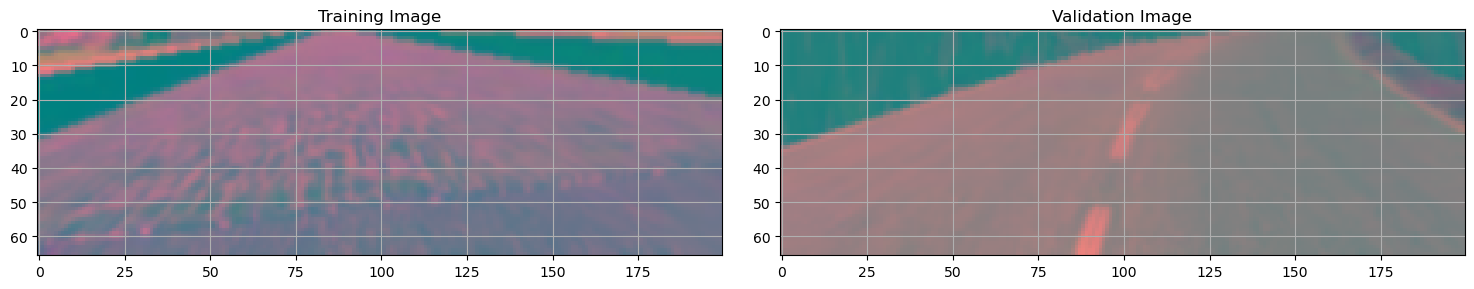

In [17]:
X_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
X_val_gen, y_val_gen = next(batch_generator(X_train, y_train, 1, 0))

fig, ax = plt.subplots(1, 2, figsize = (15,10))
fig.tight_layout()

ax[0].imshow(X_train_gen[0])
ax[0].set_title('Training Image')
ax[0].grid()

ax[1].imshow(X_val_gen[0])
ax[1].set_title('Validation Image')
ax[1].grid()

plt.show()

Now, let's create our model by using keras.

In [18]:
def nvidia_model():
    
    model = Sequential()
    
    model.add(Conv2D(24, (5, 5), strides = (2,2), input_shape = (66, 200, 3), activation = 'elu'))
    
    model.add(Conv2D(36, (5, 5), strides = (2,2), activation = 'elu'))
    
    model.add(Conv2D(48, (5, 5), strides = (2,2), activation = 'elu'))
    
    model.add(Conv2D(64, (3, 3), activation = 'elu'))
    
    model.add(Conv2D(64, (3, 3), activation = 'elu'))
    
    model.add(Flatten())
    
    model.add(Dense(100, activation = 'elu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(50, activation = 'elu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation = 'elu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1))
    
    model.compile(loss = 'mse', optimizer = Adam(learning_rate = 1e-4))
    
    return model

In [19]:
model = nvidia_model()
model.name = "nvidia model"

print(model.summary())

Model: "nvidia model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)              

In this model, we used exactly the same parameters with the parameters that are published by NVIDIA. Let's train our model, then visualize the training and validation loss values.

In [20]:
history = model.fit(batch_generator(X_train, y_train, 64, 1), 
                    steps_per_epoch = 600, 
                    epochs = 10, 
                    validation_data = batch_generator(X_val, y_val, 64, 0), 
                    validation_steps = 400, 
                    verbose = 1, 
                    shuffle = 1)


Epoch 1/10
600/600 [==============================] - 364s 606ms/step - loss: 0.1954 - val_loss: 0.1132
Epoch 2/10
600/600 [==============================] - 270s 451ms/step - loss: 0.1564 - val_loss: 0.0676
Epoch 3/10
600/600 [==============================] - 228s 381ms/step - loss: 0.1505 - val_loss: 0.1438
Epoch 4/10
600/600 [==============================] - 227s 379ms/step - loss: 0.1460 - val_loss: 0.1120
Epoch 5/10
600/600 [==============================] - 229s 382ms/step - loss: 0.1444 - val_loss: 0.0800
Epoch 6/10
600/600 [==============================] - 231s 385ms/step - loss: 0.1409 - val_loss: 0.0890
Epoch 7/10
600/600 [==============================] - 229s 382ms/step - loss: 0.1370 - val_loss: 0.0879
Epoch 8/10
600/600 [==============================] - 227s 379ms/step - loss: 0.1362 - val_loss: 0.1000
Epoch 9/10
600/600 [==============================] - 231s 385ms/step - loss: 0.1347 - val_loss: 0.0916
Epoch 10/10
600/600 [==============================] - 228s 380

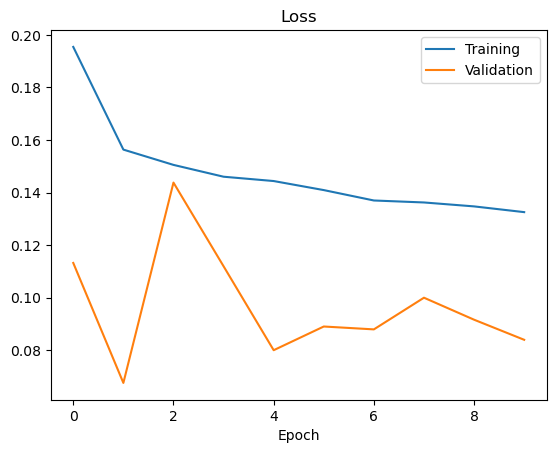

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('Epoch')

plt.show()

In order to use this model in the Udacity Self-driving Car Simulator, we need to save it. 

In [22]:
model.save('model.h5')

## Conclusion

In this project, we code a CNN model that predicts the steering value from the images obtained from the Udacity Self-driving Car Simulator. The model was constructed the same as the model that is published by NVIDIA. It is possible to get less loss value by tuning the hyperparameters. To implement this model to the simulator, you can use the codes in "drive.py". Also, I recommend you to watch the video that shows how this model works on the simulator.

## References
* Bojarski, M., Testa, D. D., Dworakowski, D., Firner, B., Flepp, B., Goyal, P., Jackel, L. D., Monfort, M., Muller, U., Zhang, J., Zhang, X., Zhao, J., &amp; Zieba, K. (2016). End to End Learning for Self-Driving Cars. *NVIDIA Developer*. Retrieved January 30, 2023, from https://developer.nvidia.com/blog/deep-learning-self-driving-cars/.
* Hasan, F. (2022). Self-Driving Car to Drive Autonomously using Image Processing and Deep Learning. *International Journal of Research in Engineering, Science and Management*, 5(1). https://doi.org/10.13140/RG.2.2.16212.88963/1 